### piston motion in a jupyter notebook

In [34]:
%matplotlib inline

import numpy as np
from numpy import pi, sin, cos, sqrt

import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [35]:
print(animation.writers.list())

['ffmpeg', 'ffmpeg_file', 'html']


In [36]:
#input parameters
r = 1.0  # crank radius
l = 4.0  # connecting rod length
rot_num = 4 # number of crank rotations
increment = 0.1 # angle incremement

In [37]:
#create the angle array, where the last angle is the number of rotations*2*pi
angle_minus_last = np.arange(0,rot_num*2*pi,increment)
angles = np.append(angle_minus_last, rot_num*2*pi)

In [38]:
X1=np.zeros(len(angles)) # array of crank x-positions: Point 1
Y1=np.zeros(len(angles)) # array of crank y-positions: Point 1
X2=np.zeros(len(angles)) # array of rod x-positions: Point 2
Y2=np.zeros(len(angles)) # array of rod y-positions: Point 2

In [39]:
#find the crank and connecting rod positions for each angle
for index,theta in enumerate(angles, start=0):

        x1 = r*cos(theta) # x-cooridnate of the crank: Point 1
        y1 = r*sin(theta) # y-cooridnate of the crank: Point 1
        x2 = 0 # x-coordinate of the rod: Point 2
        # y-coordinate of the rod: Point 2
        y2 = ((r*cos(theta-pi/2)) + (sqrt((l**2)-(r**2)*((sin(theta-pi/2))**2))))
        
        X1[index]=x1 #grab the crank x-position
        Y1[index]=y1 #grab the crank y-position
        X2[index]=x2 #grab the rod x-position
        Y2[index]=y2 #grab the rod y-position

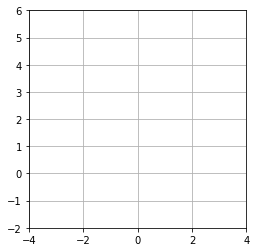

In [40]:
# set up the figure and subplot
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False, xlim=(-4,4), ylim=(-2,6))
ax.grid()
line, = ax.plot([], [], 'o-', lw=5, color='g')

In [41]:
# initialization function
def init():
        line.set_data([], [])
        return (line,)

In [42]:
# animation function
def animate(i):
        thisx = [0, X1[i], X2[i]]
        thisy = [0, Y1[i], Y2[i]]

        line.set_data(thisx, thisy)
        return line,

In [43]:
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(X1), interval=20, blit=True, repeat=False)

In [45]:
HTML(ani.to_html5_video())

In [46]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [47]:
ani